In [1]:
from generate_spectra import get_data_spectra
from sbi_posterior import main as sbi_posterior
import numpy as np
from time import time
import torch
from torch.distributions import half_normal
import matplotlib.pyplot as plt

/mn/stornext/u3/aeadler/anaconda2/envs/sbi/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mn/stornext/u3/aeadler/anaconda2/envs/python37/lib/python3.7/site-packages/pkg_resources/__init__.py:126: PkgResourcesDeprecationWarning: 1.11.0-3-g029c is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


In [7]:
freqs=np.array([27., 39., 93., 145., 225., 280.])
seed = 100
nside=128
nCl = len(freqs)*(3*nside-1)
mean_params = dict()
mean_params['A_lens'] = 1
mean_params['unit_beams'] = True
n_train = 25

r_prior = half_normal.HalfNormal(torch.tensor([0.1]))
r_vector = r_prior.sample_n(n_train)
data_tensor = np.zeros((n_train, 55296))
t1 = time()
for i, r in enumerate(r_vector):
    mean_params['r_tensor'] = float(r)
    data_tensor[i] = get_data_spectra(freqs=freqs, nside=nside, outdir="./output", mean_params=mean_params, seed=seed).flatten()
print(f"Generated {n_train} spectra in {time()-t1:.2f}s")
t2 = time()
posterior = sbi_posterior(r_prior, r_vector, data_tensor)
print(f"Posterior estimated in {time()-t2:.2f}s")

nu (GHz) | sigma_I (uK_CMB amin) | sigma_P (uK_CMB amin) | FWHM (arcmin) 

0027.00 | 00.00 | 00.00 | 00.00 
0039.00 | 00.00 | 00.00 | 00.00 
0093.00 | 00.00 | 00.00 | 00.00 
0145.00 | 00.00 | 00.00 | 00.00 
0225.00 | 00.00 | 00.00 | 00.00 
0280.00 | 00.00 | 00.00 | 00.00 
Instrument attribute 'pixel_indices' not set.
nu (GHz) | sigma_I (uK_CMB amin) | sigma_P (uK_CMB amin) | FWHM (arcmin) 

0027.00 | 00.00 | 00.00 | 00.00 
0039.00 | 00.00 | 00.00 | 00.00 
0093.00 | 00.00 | 00.00 | 00.00 
0145.00 | 00.00 | 00.00 | 00.00 
0225.00 | 00.00 | 00.00 | 00.00 
0280.00 | 00.00 | 00.00 | 00.00 
Instrument attribute 'pixel_indices' not set.
nu (GHz) | sigma_I (uK_CMB amin) | sigma_P (uK_CMB amin) | FWHM (arcmin) 

0027.00 | 00.00 | 00.00 | 00.00 
0039.00 | 00.00 | 00.00 | 00.00 
0093.00 | 00.00 | 00.00 | 00.00 
0145.00 | 00.00 | 00.00 | 00.00 
0225.00 | 00.00 | 00.00 | 00.00 
0280.00 | 00.00 | 00.00 | 00.00 
Instrument attribute 'pixel_indices' not set.
nu (GHz) | sigma_I (uK_CMB amin) | sigma_P 

In [8]:
mean_params['r_tensor'] = 0.01
observation = get_data_spectra(freqs=freqs, nside=nside, outdir="./output", mean_params=mean_params, seed=seed).flatten()
samples = posterior.sample((10000,), x=observation)
log_probability = posterior.log_prob(samples, x=observation)

nu (GHz) | sigma_I (uK_CMB amin) | sigma_P (uK_CMB amin) | FWHM (arcmin) 

0027.00 | 00.00 | 00.00 | 00.00 
0039.00 | 00.00 | 00.00 | 00.00 
0093.00 | 00.00 | 00.00 | 00.00 
0145.00 | 00.00 | 00.00 | 00.00 
0225.00 | 00.00 | 00.00 | 00.00 
0280.00 | 00.00 | 00.00 | 00.00 
Instrument attribute 'pixel_indices' not set.


Drawing 10000 posterior samples: 11624it [00:39, 294.96it/s]                                                                                                                       


(array([221., 210., 208., 234., 215., 262., 257., 244., 254., 253., 249.,
        263., 241., 244., 232., 248., 233., 231., 239., 226., 212., 196.,
        220., 198., 205., 204., 194., 215., 204., 196., 172., 162., 162.,
        164., 146., 143., 131., 133., 115., 103., 127., 100., 112., 105.,
        102.,  95.,  97.,  83.,  61.,  80.,  70.,  54.,  53.,  63.,  56.,
         53.,  44.,  36.,  36.,  19.,  28.,  23.,  23.,  25.,  15.,  14.,
         20.,  15.,  18.,  12.,  21.,  14.,   4.,  12.,  12.,  10.,   4.,
          6.,   2.,   4.,   4.,   3.,   3.,   1.,   3.,   2.,   3.,   5.,
          1.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,
          2.]),
 array([5.3821577e-06, 1.0254148e-03, 2.0454472e-03, 3.0654799e-03,
        4.0855124e-03, 5.1055453e-03, 6.1255777e-03, 7.1456102e-03,
        8.1656426e-03, 9.1856755e-03, 1.0205708e-02, 1.1225740e-02,
        1.2245773e-02, 1.3265805e-02, 1.4285838e-02, 1.5305871e-02,
        1.6325904e-02, 1.7345937e-02, 1.836596

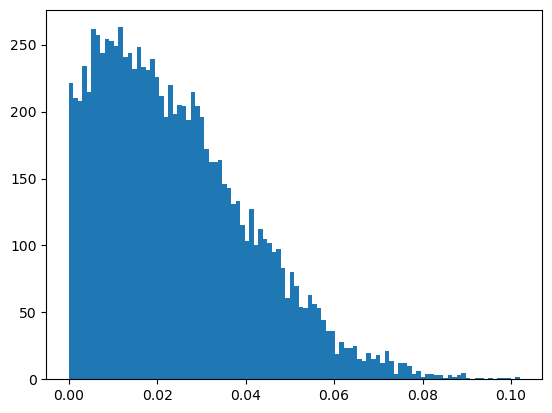

In [9]:
plt.hist(np.array(samples), bins=100)